2023-05-29 19:57:56.264268: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.1                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -20.0|  7.167e-01|  4.791e-01|            7850|     6.257e-01|     4.277e-01|               7008|   6.294e-01|   4.244e-01|          

/Users/im/Documents/GitHub/sionna/Jupyter Notebooks/YCodeYCorr/YCodeYCorr.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


|                                                                            Data Group 2                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -20.0|  7.423e-01|  4.987e-01|            8170|     6.456e-01|     4.309e-01|               7060|   6.598e-01|   4.440e-01|             7274|      1.504e+02|
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   

(array([-20. , -12.5,  -5. ,   2.5,  10. ]),
 array([[0.71450195, 0.659021  , 0.52423096, 0.27944336, 0.08266602],
        [0.73956299, 0.72189941, 0.67431641, 0.56401367, 0.33748779],
        [0.73756104, 0.71853027, 0.67744141, 0.56431885, 0.33842773],
        [0.74376221, 0.73956299, 0.72169189, 0.68686523, 0.58867187]]),
 array([[0.62947998, 0.4836792 , 0.26522217, 0.07653809, 0.01472168],
        [0.64958496, 0.56142578, 0.43126221, 0.26015625, 0.09381104],
        [0.64630127, 0.55740967, 0.43555908, 0.26311035, 0.09329834],
        [0.6567749 , 0.58795166, 0.51225586, 0.40793457, 0.25771484]]),
 array([[0.63266602, 0.49063721, 0.24395752, 0.02626953, 0.00101318],
        [0.66087646, 0.57763672, 0.44173584, 0.22242432, 0.06069336],
        [0.65887451, 0.58164063, 0.44951172, 0.22919922, 0.06525879],
        [0.67012939, 0.61829834, 0.53861084, 0.41376953, 0.28435059]]))

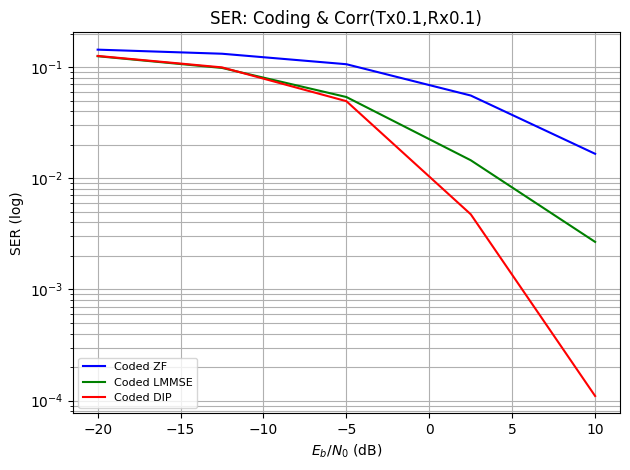

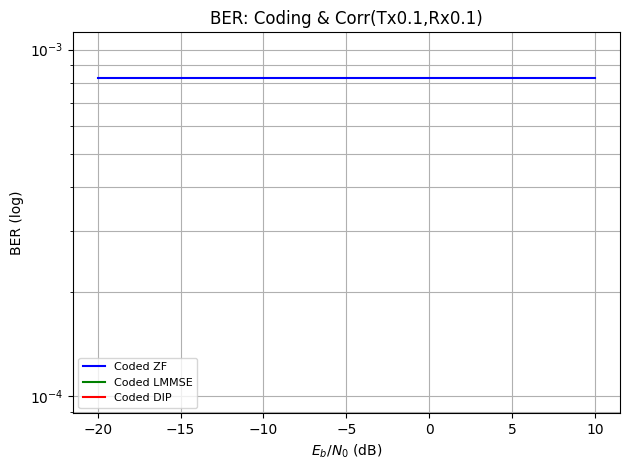

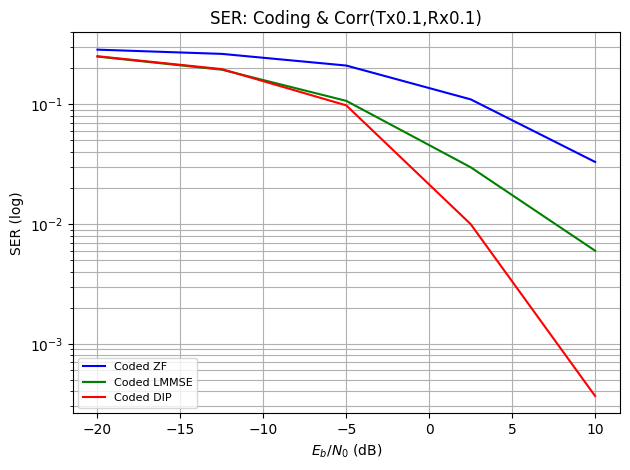

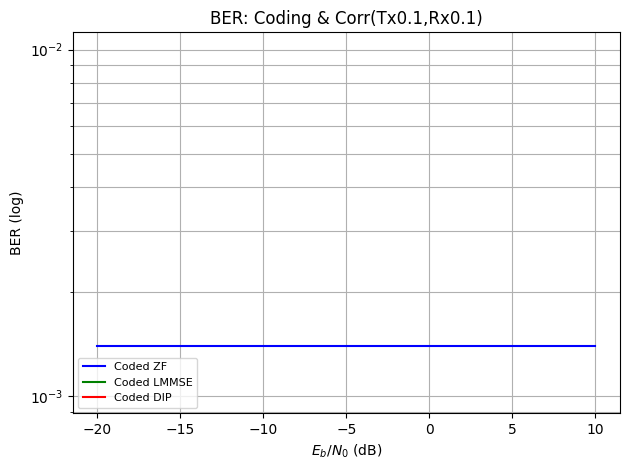

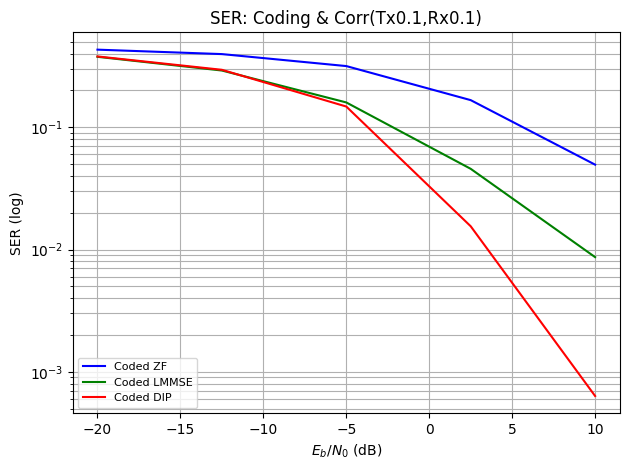

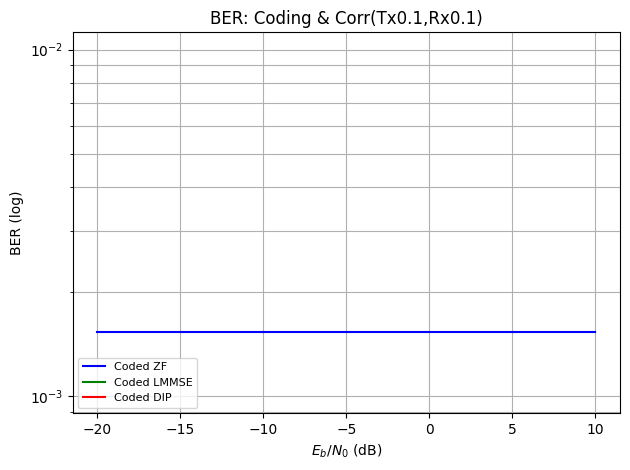

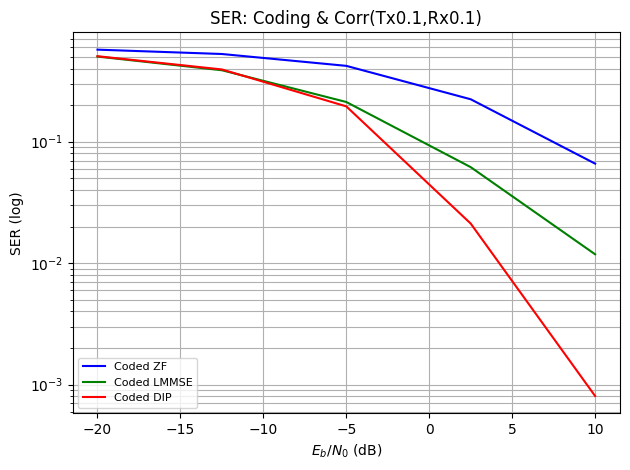

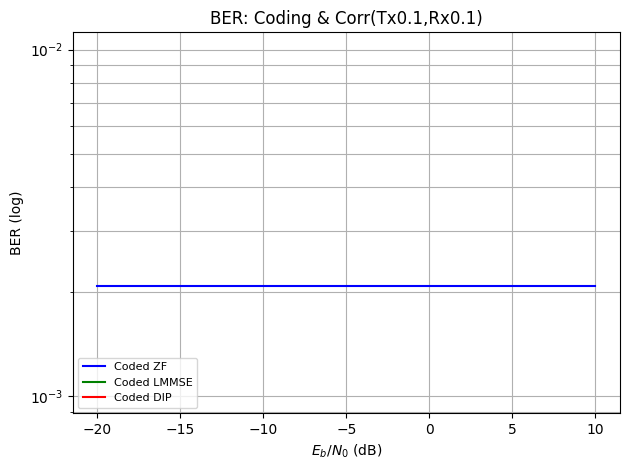

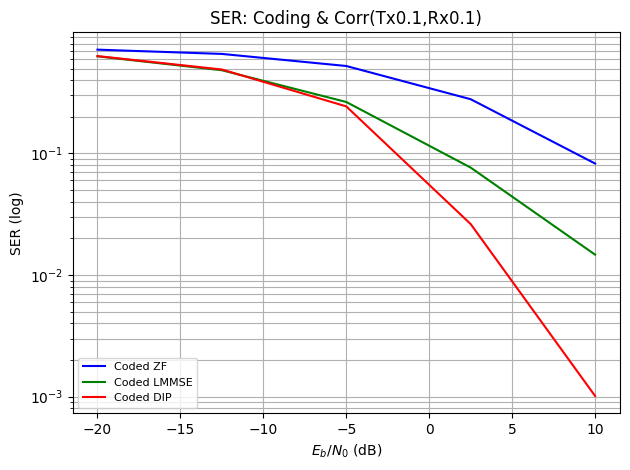

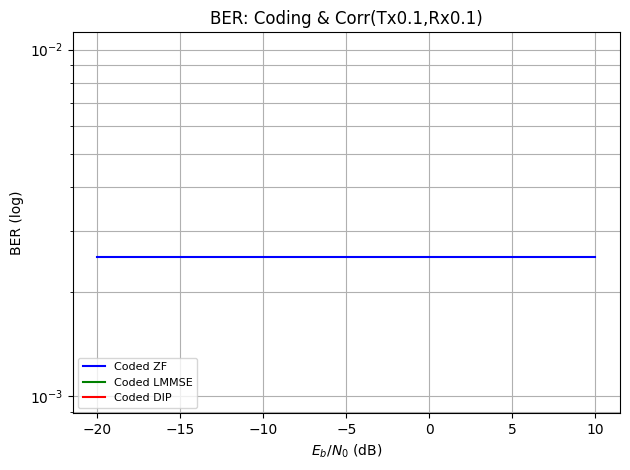

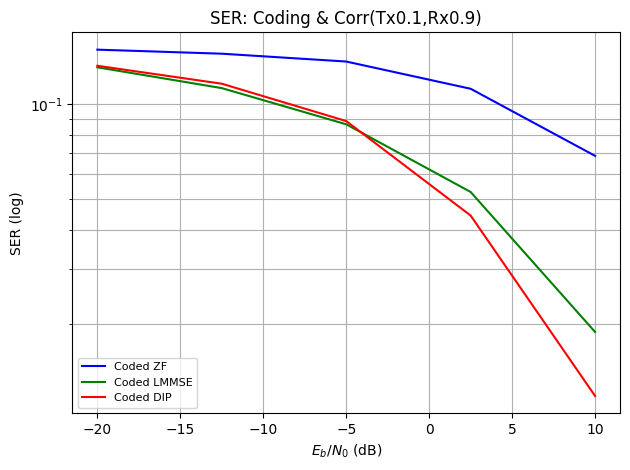

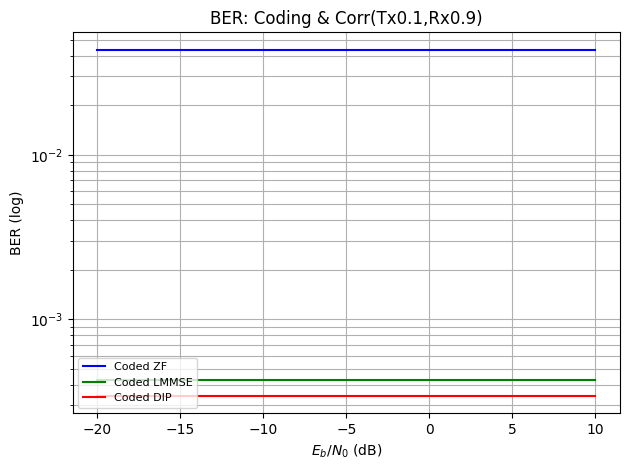

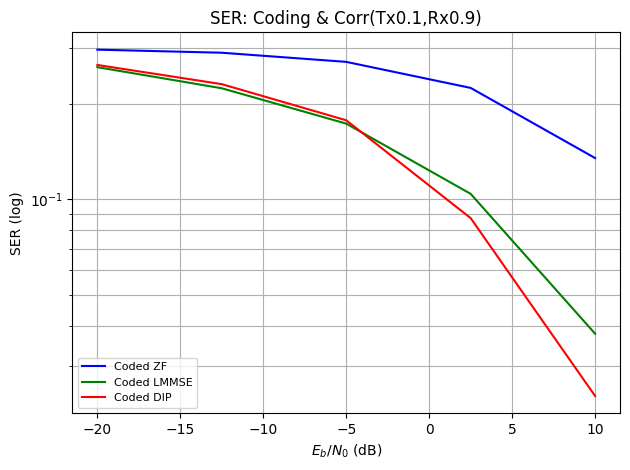

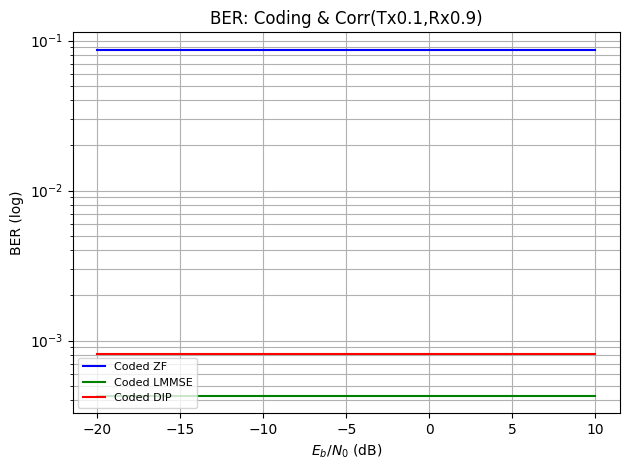

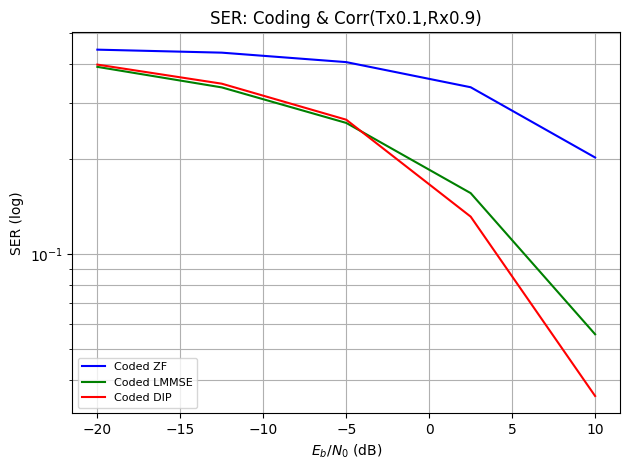

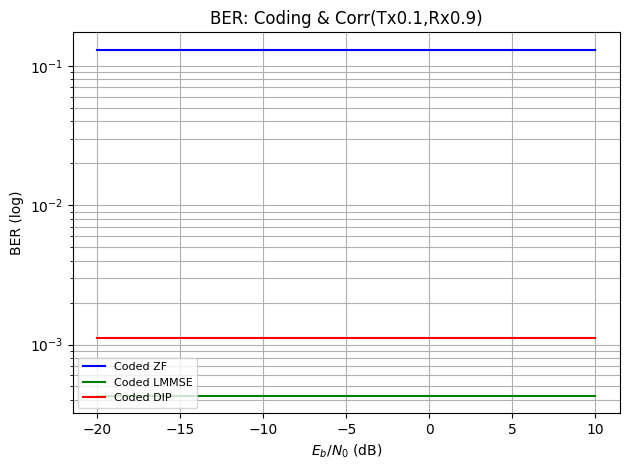

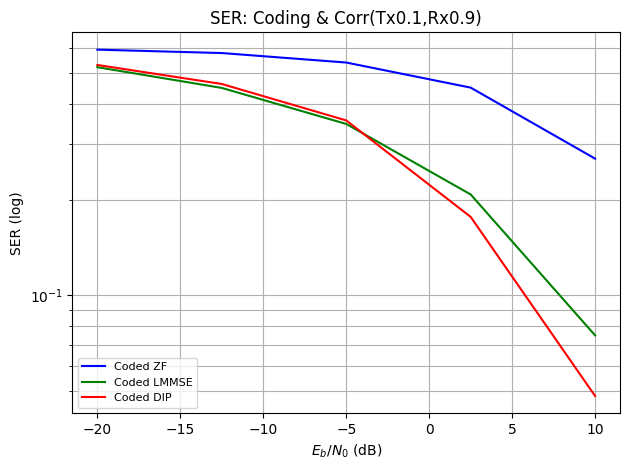

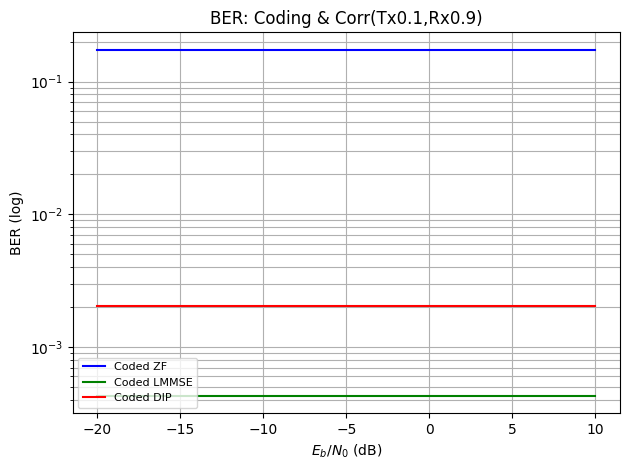

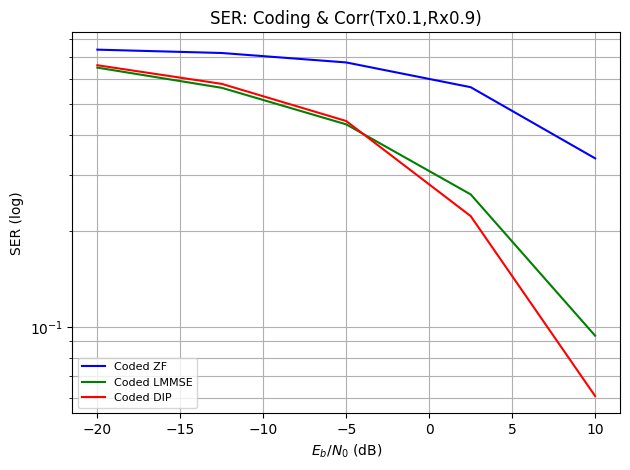

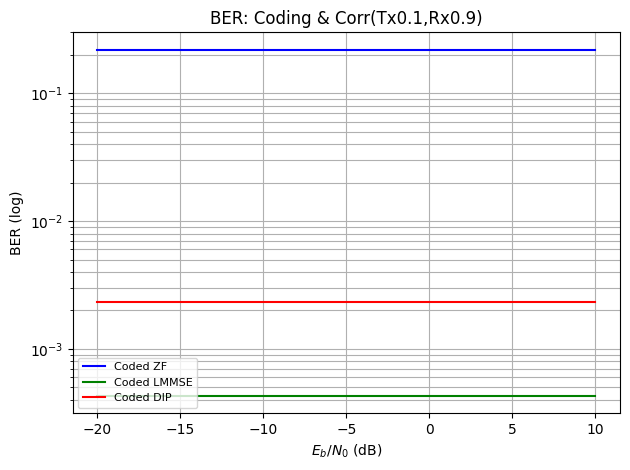

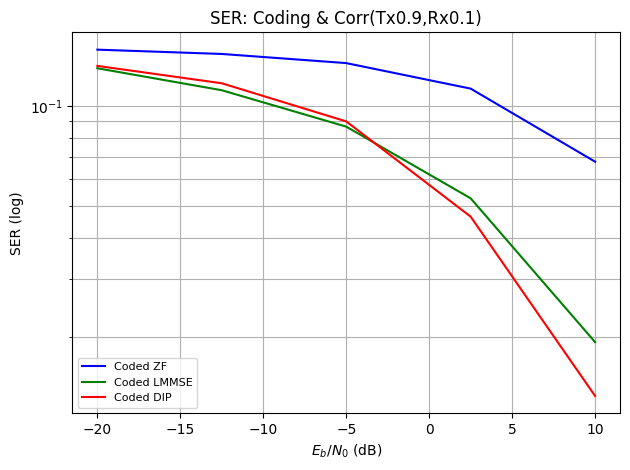

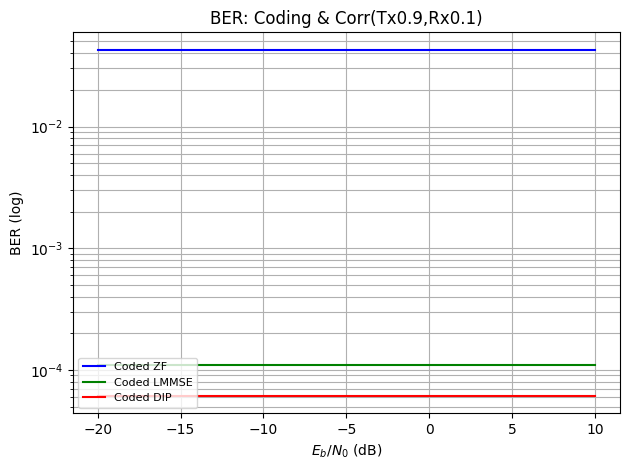

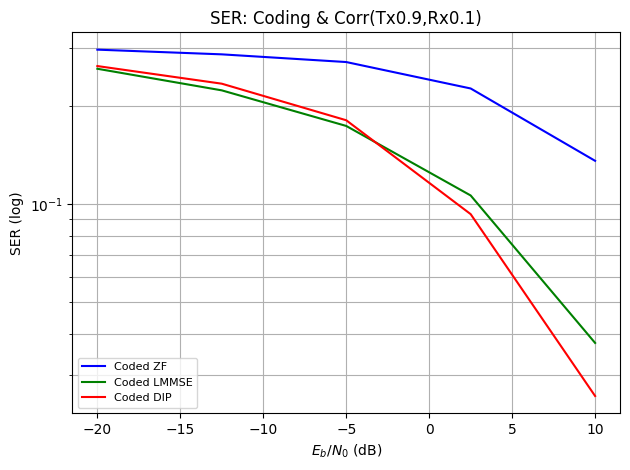

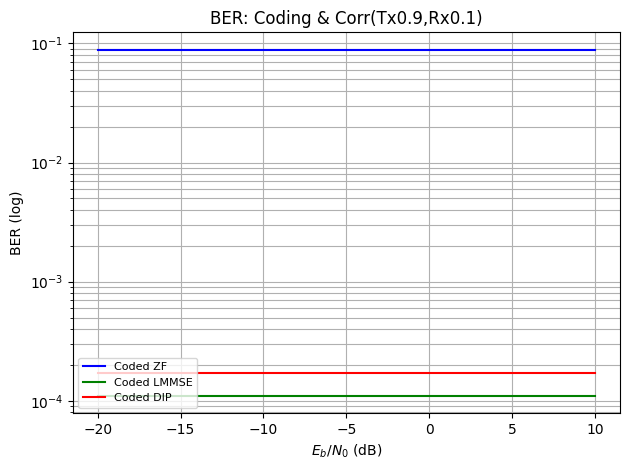

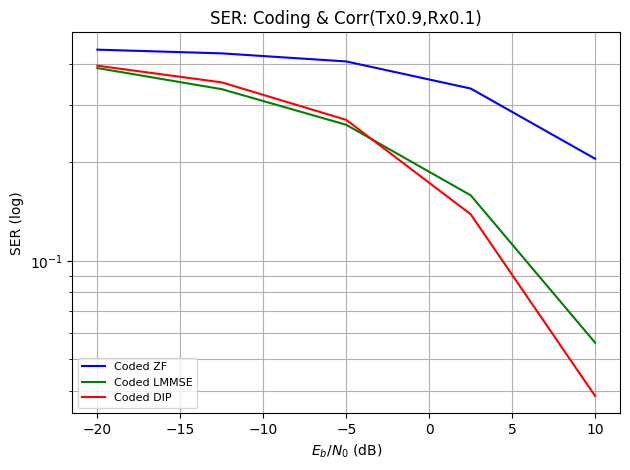

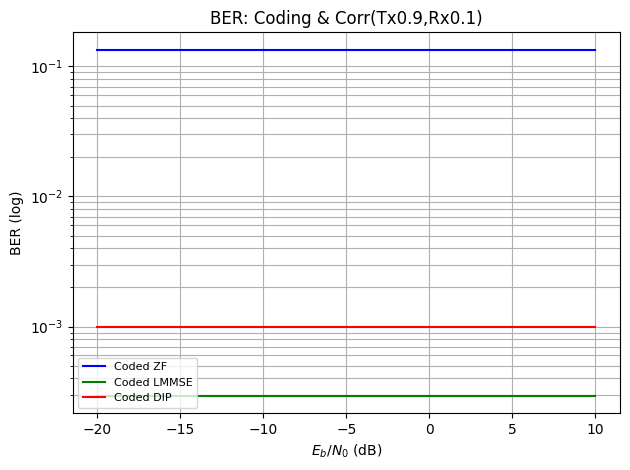

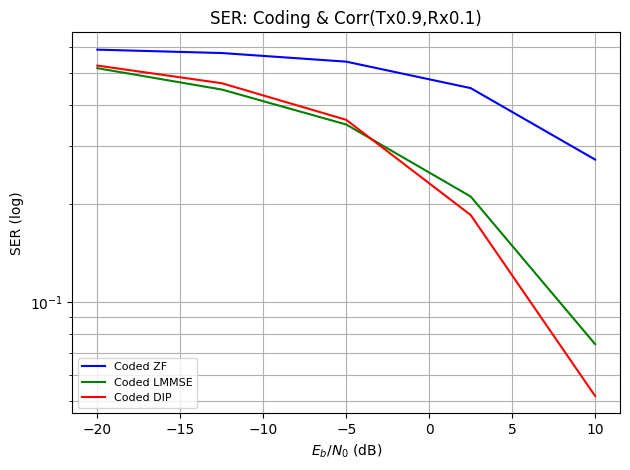

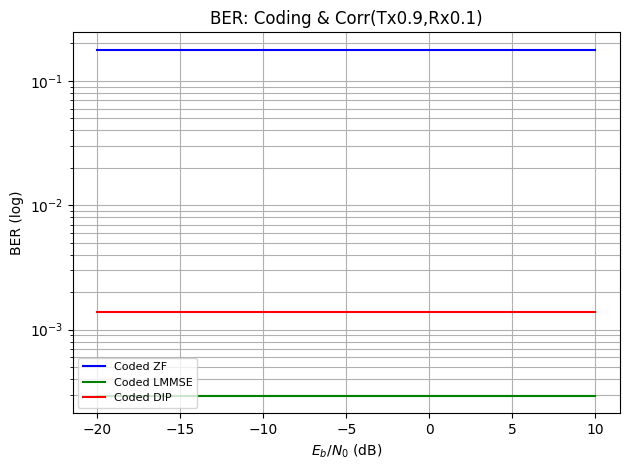

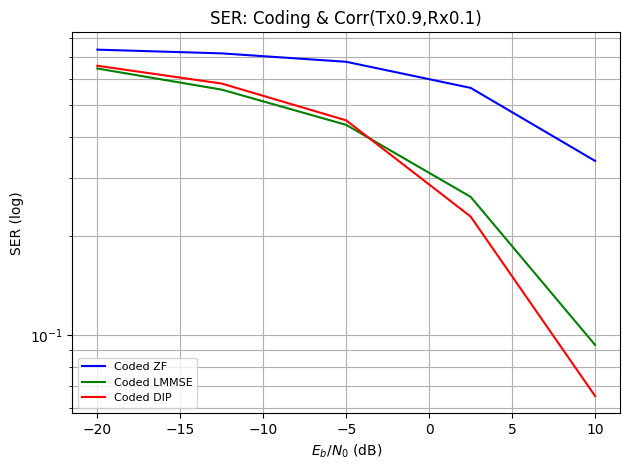

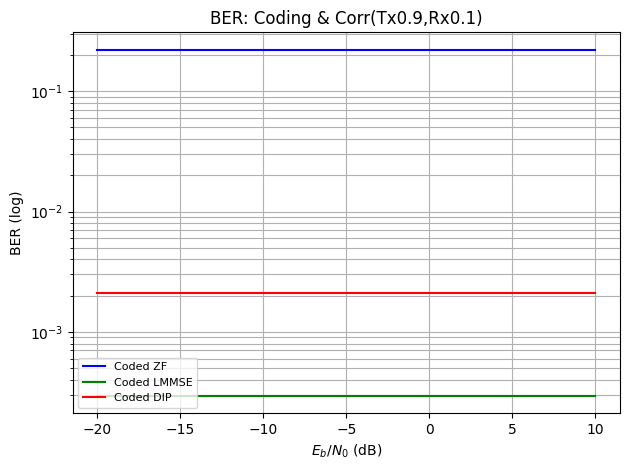

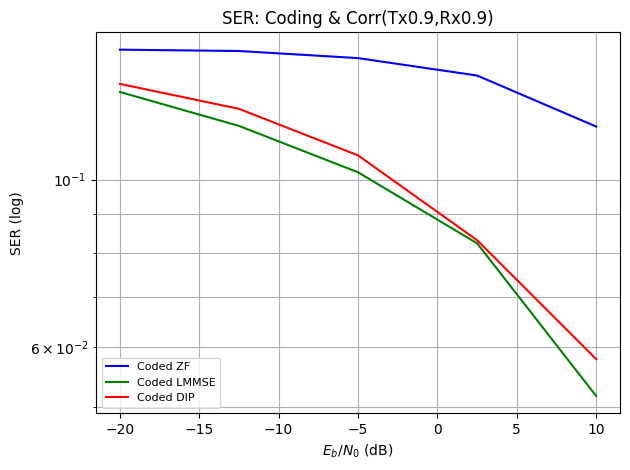

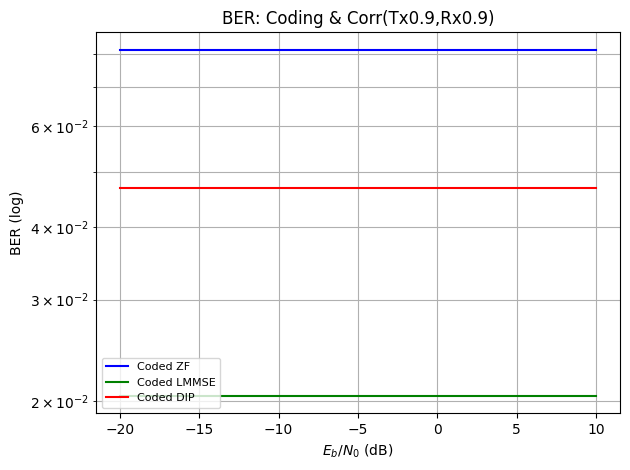

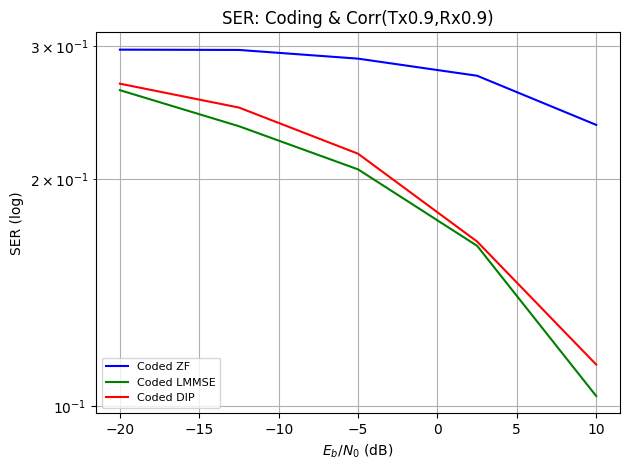

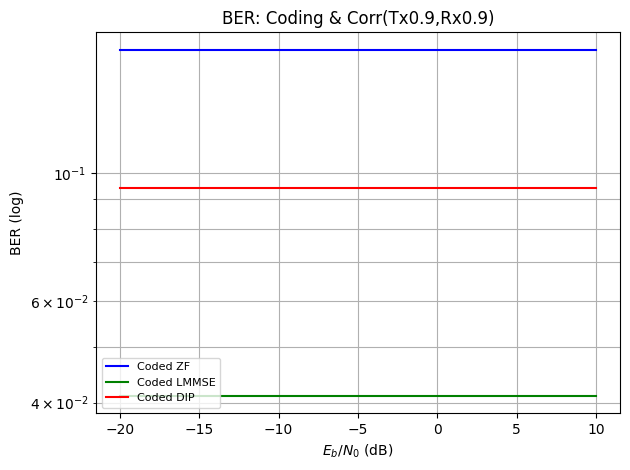

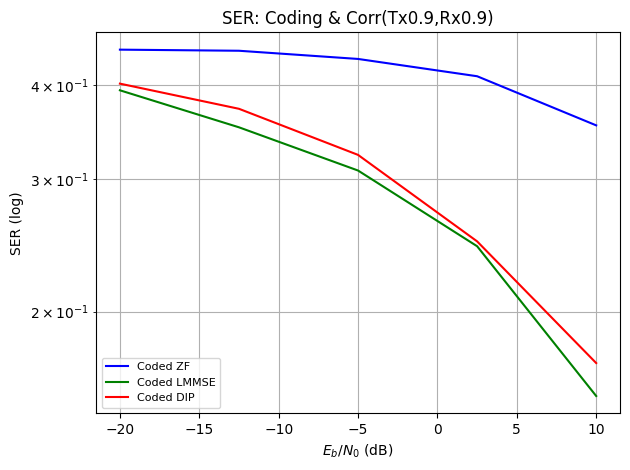

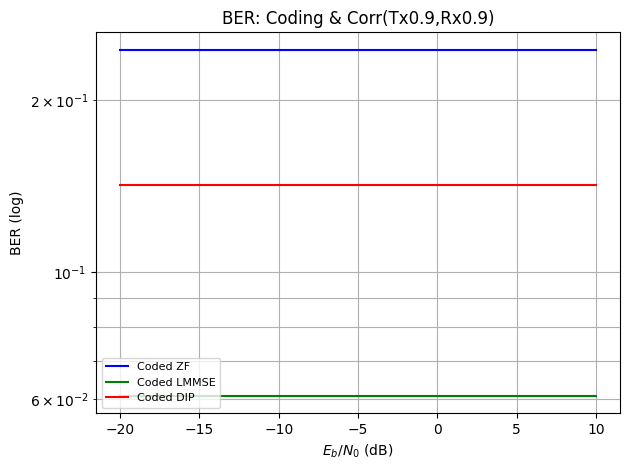

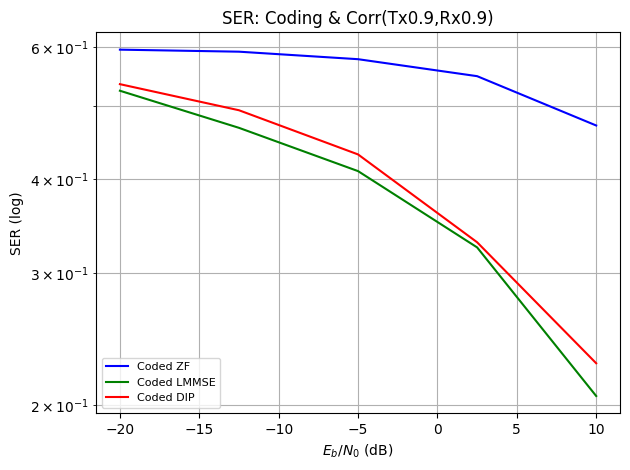

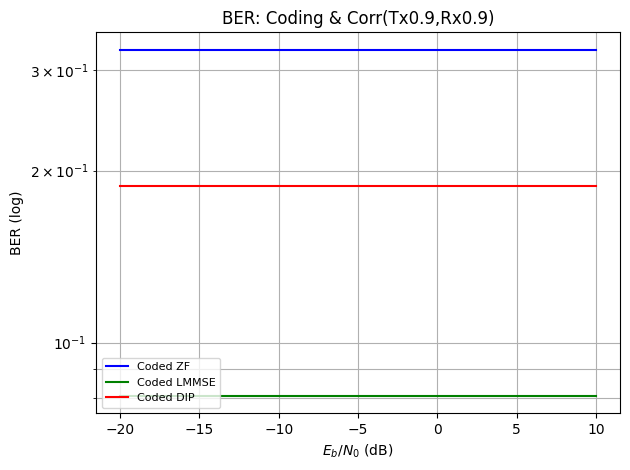

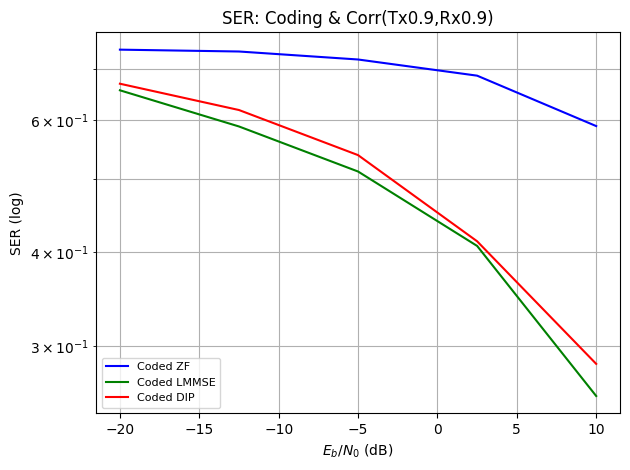

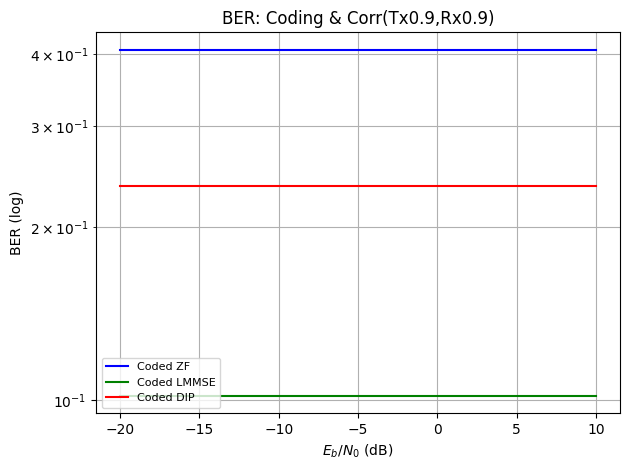

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from YCodeYCorr import ycodeycorr

### Test Parameters
Block_Length = 64               # Block Length (k)
NUM_BITS_PER_SYMBOL = 2         # Mapping: 4QAM
CONSTELLATION_TYPE = "qam"      #
DEMAPPING_METHOD = "app"        # Demapping Method: "app"
NUM_TX_ANT = 8                  # Transmit Antennas
NUM_RX_ANT = 8                  # Receive Antennas
CODERATE = 0.5                  # Code Rate
CORRELATION_INDEX_MIN = 0.1     # Minimum Spatial Correlation
CORRELATION_INDEX_MAX = 0.9     # Maximum Spatial Correlation
CORRELATION_INDEX_POINTS = 2    # Correlation Points between Max and Min

NUM_DATA_GROUP = 5              # Number of Data Group
BATCH_SIZE = 32                 # Number of Parallelly Processed Batches
EBN0_DB_MIN = -20.0             # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 10.0               # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 5             # EBNO Points

model_ycodeycorr = ycodeycorr(Block_Length, 
                                NUM_BITS_PER_SYMBOL,
                                CONSTELLATION_TYPE,
                                DEMAPPING_METHOD,
                                NUM_RX_ANT,
                                NUM_TX_ANT,
                                CODERATE,
                                CORRELATION_INDEX_MIN,
                                CORRELATION_INDEX_MAX,
                                CORRELATION_INDEX_POINTS)

model_ycodeycorr(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)